In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the customer data into a DataFrame
nba_df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', delimiter=";", encoding="latin-1", index_col=0)

# Remove duplicate players- i.e. players who changed teams during the season- and keep only total player stats for that player
nba_df.drop_duplicates(subset = "Player", keep = "first", inplace = True)

# Check the first 10 rows
pd.set_option('display.max_columns', None)
nba_df.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5
7,Jarrett Allen,C,25,CLE,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5
8,Timmy Allen,SF,24,MEM,5,0,25.0,1.2,4.6,0.261,0.0,1.4,0.000,1.2,3.2,0.375,0.261,0.2,0.4,0.500,0.8,2.6,3.4,1.0,0.8,0.0,0.4,3.6,2.6
9,Jose Alvarado,PG,25,NOP,56,0,18.4,2.5,6.2,0.412,1.4,3.7,0.377,1.1,2.5,0.464,0.525,0.6,0.9,0.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1


In [9]:
nba_df2 = nba_df[nba_df['G'] >= 41]
nba_df2.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5
7,Jarrett Allen,C,25,CLE,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5
9,Jose Alvarado,PG,25,NOP,56,0,18.4,2.5,6.2,0.412,1.4,3.7,0.377,1.1,2.5,0.464,0.525,0.6,0.9,0.673,0.4,1.8,2.3,2.1,1.1,0.3,0.7,1.6,7.1
10,Kyle Anderson,PF,30,MIN,79,10,22.6,2.5,5.5,0.460,0.1,0.6,0.229,2.4,4.9,0.488,0.472,1.2,1.7,0.708,0.8,2.7,3.5,4.2,0.9,0.6,1.2,1.6,6.4


In [10]:
nba_df2["Pos"].value_counts()

SF       76
SG       72
C        65
PF       64
PG       61
PG-SG     3
C-PF      2
PF-C      1
SF-PF     1
PF-SF     1
SF-SG     1
SG-PG     1
Name: Pos, dtype: int64

In [12]:
nba_df2['Pos'].replace(['PG', 'SG', 'SF', 'PF', 'C', 'PG-SG', 'C-PF', 'PF-C', 'SF-PF', 'PF-SF', 'SF-SG', 'SG-PG'],
                      [1, 2, 3, 4, 5, 1, 5, 4, 3, 4, 3, 2], inplace=True)

C:\Users\srken\AppData\Local\Temp\ipykernel_39868\1666923495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df2['Pos'].replace(['PG', 'SG', 'SF', 'PF', 'C', 'PG-SG', 'C-PF', 'PF-C', 'SF-PF', 'PF-SF', 'SF-SG', 'SG-PG'],


In [13]:
nba_df2['Pos'].value_counts()

3    78
2    73
5    67
4    66
1    64
Name: Pos, dtype: int64

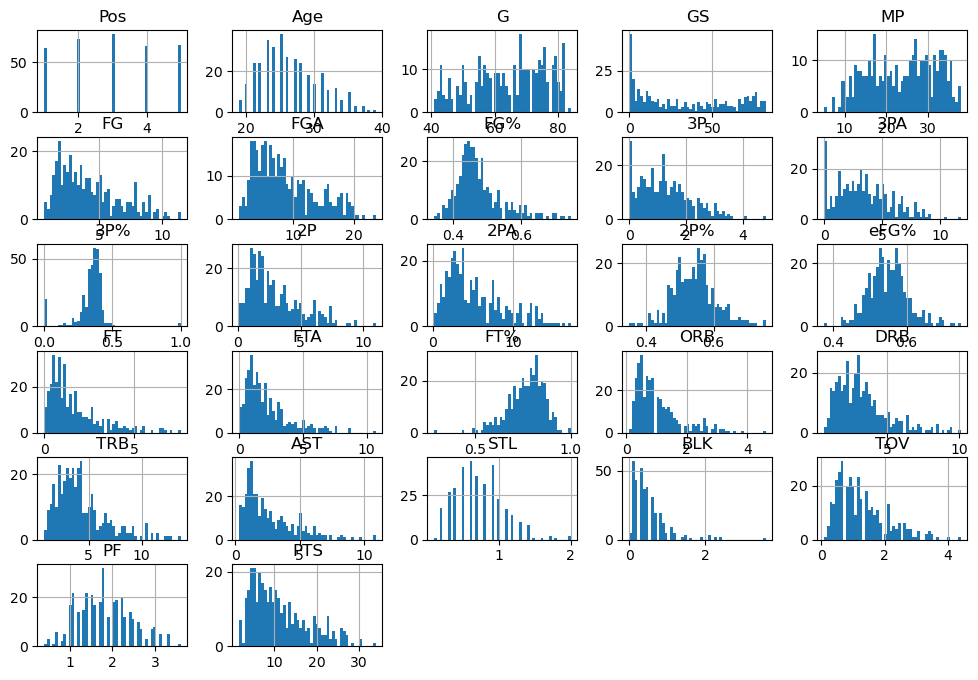

In [14]:
nba_df2.hist(bins=50, figsize = (12, 8))
plt.show()

In [19]:
import numpy as np

C:\Users\srken\AppData\Local\Temp\ipykernel_39868\1066718238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df2["mp_cat"] = pd.cut(nba_df2["MP"],


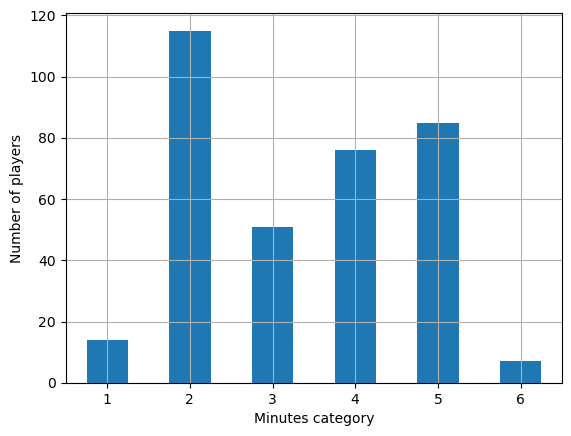

2    0.328571
5    0.242857
4    0.214286
3    0.142857
1    0.042857
6    0.028571
Name: mp_cat, dtype: float64

In [25]:
corr_matrix = nba_df2.corr()

In [27]:
corr_matrix["Pos"].sort_values(ascending=False)

Pos     1.000000
ORB     0.615606
FG%     0.530608
2P%     0.528608
TRB     0.496817
BLK     0.479463
DRB     0.400281
eFG%    0.379411
PF      0.220871
2P      0.116052
Age     0.060011
FTA     0.037043
2PA     0.026447
GS      0.003385
FT     -0.019892
G      -0.053887
FG     -0.058504
PTS    -0.102946
MP     -0.118485
TOV    -0.126360
FGA    -0.177640
STL    -0.265711
3P%    -0.317208
FT%    -0.339498
AST    -0.403203
3P     -0.408416
3PA    -0.416263
Name: Pos, dtype: float64

In [38]:
nba_df2['3PA_per_min'] = nba_df2['3PA']/nba_df2['MP']
nba_df2['STL_per_min'] = nba_df2['STL']/nba_df2['MP']
nba_df2['2PA_per_min'] = nba_df2['2PA']/nba_df2['MP']
nba_df2['FTA_per_min'] = nba_df2['FTA']/nba_df2['MP']
nba_df2['TRB_per_min'] = nba_df2['TRB']/nba_df2['MP']
nba_df2['ORB_per_min'] = nba_df2['ORB']/nba_df2['MP']
nba_df2['DRB_per_min'] = nba_df2['DRB']/nba_df2['MP']
nba_df2['TOV_per_min'] = nba_df2['TOV']/nba_df2['MP']
nba_df2['AST_per_min'] = nba_df2['AST']/nba_df2['MP']
nba_df2['BLK_per_min'] = nba_df2['BLK']/nba_df2['MP']
nba_df2['AST_per_TOV'] = nba_df2['AST']/nba_df2['TOV']
nba_df2['PTS_per_min'] = nba_df2['PTS']/nba_df2['MP']

C:\Users\srken\AppData\Local\Temp\ipykernel_39868\2880620882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df2['3PA_per_min'] = nba_df2['3PA']/nba_df2['MP']
C:\Users\srken\AppData\Local\Temp\ipykernel_39868\2880620882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df2['STL_per_min'] = nba_df2['STL']/nba_df2['MP']
C:\Users\srken\AppData\Local\Temp\ipykernel_39868\2880620882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [39]:
corr_matrix2 = nba_df2.corr()
corr_matrix2["Pos"].sort_values(ascending=False)

Pos            1.000000
TRB_per_min    0.727791
ORB_per_min    0.679477
DRB_per_min    0.672452
ORB            0.615606
BLK_per_min    0.573943
FG%            0.530608
2P%            0.528608
TRB            0.496817
BLK            0.479463
DRB            0.400281
eFG%           0.379411
PF             0.220871
FTA_per_min    0.160467
2PA_per_min    0.132306
2P             0.116052
Age            0.060011
FTA            0.037043
2PA            0.026447
GS             0.003385
FT            -0.019892
G             -0.053887
PTS_per_min   -0.058388
FG            -0.058504
TOV_per_min   -0.074894
PTS           -0.102946
MP            -0.118485
TOV           -0.126360
FGA           -0.177640
STL_per_min   -0.259202
STL           -0.265711
3P%           -0.317208
FT%           -0.339498
AST           -0.403203
3P            -0.408416
3PA           -0.416263
3PA_per_min   -0.462173
AST_per_min   -0.494193
AST_per_TOV   -0.495038
Name: Pos, dtype: float64

C:\Users\srken\AppData\Local\Temp\ipykernel_39868\2790727522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df2["mp_cat"] = pd.cut(nba_df2["MP"],


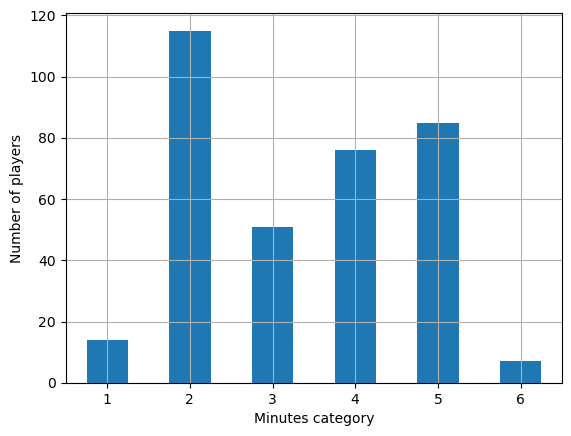

In [42]:
nba_df2["mp_cat"] = pd.cut(nba_df2["MP"],
                               bins=[0., 10, 20, 25, 30, 36., np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

nba_df2["mp_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Minutes category")
plt.ylabel("Number of players")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    nba_df2, test_size=0.2, stratify=nba_df2["mp_cat"], random_state=42)

strat_test_set['mp_cat'].value_counts()/len(strat_test_set)

2    0.328571
5    0.242857
4    0.214286
3    0.142857
1    0.042857
6    0.028571
Name: mp_cat, dtype: float64

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("mp_cat", axis=1, inplace=True)

In [47]:
nba_train = strat_train_set.copy()
nba_test = strat_test_set.copy()

In [48]:
relevant_cols = ["PTS", "3PA_per_min", "3P%", "2PA_per_min", "2P%",
                 "FTA_per_min", "FT%", "TRB_per_min", "AST_per_TOV", "STL", "BLK_per_min"]
X_train = nba_train[relevant_cols]
X_test = nba_test[relevant_cols]

In [49]:
y_train = nba_train['Pos']
y_test = nba_test['Pos']

print(X_train.head())
print(y_train.head())

      PTS  3PA_per_min    3P%  2PA_per_min    2P%  FTA_per_min    FT%  \
Rk                                                                      
314   9.3     0.128631  0.373     0.190871  0.516     0.058091  0.763   
517   5.4     0.237705  0.375     0.139344  0.549     0.032787  0.800   
267  11.0     0.118033  0.418     0.134426  0.568     0.068852  0.867   
249   7.9     0.000000  0.000     0.295181  0.704     0.114458  0.561   
400   9.2     0.120301  0.385     0.184211  0.499     0.041353  0.633   

     TRB_per_min  AST_per_TOV  STL  BLK_per_min  
Rk                                               
314     0.149378     2.500000  1.2     0.004149  
517     0.188525     1.666667  0.5     0.016393  
267     0.118033     2.166667  1.4     0.026230  
249     0.301205     1.714286  0.4     0.066265  
400     0.218045     3.083333  0.8     0.007519  
Rk
314    1
517    4
267    3
249    4
400    2
Name: Pos, dtype: int64


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1, 1))

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [51]:
scaler2 = MinMaxScaler(feature_range = (-1, 1))

scaler2.fit(X_test)

X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, softmax
from sklearn.preprocessing import StandardScaler

In [56]:
min_samples_leaf_list = [2,10, 30, 50, 100, 200, 300, 700]  
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]
learning_rate_list =[0.01, 0.1, 0.3,0.5]

In [62]:
parameters = {'max_depth':max_depth_list,
              'min_samples_leaf':min_samples_leaf_list, }
clf = RandomizedSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
clf.best_params_

{'min_samples_leaf': 30, 'max_depth': 4}

In [63]:
parameters = {'max_depth':max_depth_list, 
              'min_samples_leaf':min_samples_leaf_list, 
              'n_estimators': n_estimators_list, }
clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
clf.best_params_

{'n_estimators': 10, 'min_samples_leaf': 10, 'max_depth': 4}

In [64]:
parameters = {'n_estimators': n_estimators_list, 
              'learning_rate': learning_rate_list}
clf = RandomizedSearchCV(AdaBoostClassifier(), parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
clf.best_params_

{'n_estimators': 10, 'learning_rate': 0.3}

In [65]:
d_tree_clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
r_f_clf = RandomForestClassifier(max_depth = 4, min_samples_leaf = 10, n_estimators = 10)
ada_clf = AdaBoostClassifier(learning_rate = 0.3, n_estimators = 10)

In [67]:
d_tree_clf.fit(X_train, y_train)
r_f_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=10)

In [73]:
de_pred_train = d_tree_clf.predict(X_train)
de_pred_test = d_tree_clf.predict(X_test) 

print(accuracy_score(y_train, de_pred_train))
print(accuracy_score(y_test, de_pred_test))

0.5755395683453237
0.5


In [74]:
rf_pred_train = r_f_clf.predict(X_train)
rf_pred_test = r_f_clf.predict(X_test) 

print(accuracy_score(y_train, rf_pred_train))
print(accuracy_score(y_test, rf_pred_test))

0.6258992805755396
0.5285714285714286


In [75]:
a_pred_train = ada_clf.predict(X_train)
a_pred_test = ada_clf.predict(X_test) 

print(accuracy_score(y_train, a_pred_train))
print(accuracy_score(y_test, a_pred_test))

0.43884892086330934
0.4142857142857143


In [82]:
print(a_pred_test[:5], rf_pred_test[:5], de_pred_test[:5], y_test[:5])

[5 4 1 5 3] [5 3 1 5 3] [4 3 1 5 2] Rk
24     5
389    3
298    1
176    5
90     2
Name: Pos, dtype: int64


In [120]:
X_train_np=X_train.values
X_train_np = np.asarray(X_train_np).astype(np.float32)
y_train_np=y_train.values
y_train_np = y_train_np-1 # need categories as 0-4, not 1-5 for softmax output
y_train_np=y_train_np.reshape(y_train_np.size,1)

X_test_np=X_test.values
X_test_np = np.asarray(X_test_np).astype(np.float32)
y_test_np=y_test.values
y_test_np = y_test_np-1
y_test_np=y_test_np.reshape(y_test_np.size,1)

print(y_test_np[:5])
y_test_np.shape

[[4]
 [2]
 [0]
 [4]
 [1]]


(70, 1)

In [121]:
model = Sequential(
[
    Dense(100, activation="relu"),
    Dense(300, activation="relu"),
    Dense(5, activation="softmax")
])

In [122]:
model.compile(loss="sparse_categorical_crossentropy",

optimizer="adam",

metrics=["accuracy"]

)
model.fit(
    X_train_np,y_train_np,
    epochs=50
)

Epoch 1/50
9/9 [==============================] - 1s 3ms/step - loss: 1.7365 - accuracy: 0.1906
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 1.6114 - accuracy: 0.2806
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 1.5786 - accuracy: 0.2590
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 1.5784 - accuracy: 0.2770
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 1.5556 - accuracy: 0.2734
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 1.5338 - accuracy: 0.3094
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 1.5175 - accuracy: 0.3094
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 1.5094 - accuracy: 0.3669
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 1.5046 - accuracy: 0.3165
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 1.4884 - accuracy: 0.3453
Epoch 11/50
9/9 [======================

In [123]:
y_pred_train = model.predict(X_train_np)
y_pred_train[:10]

9/9 [==============================] - 0s 3ms/step


array([[3.90001327e-01, 3.10584337e-01, 2.25367531e-01, 6.27608523e-02,
        1.12859523e-02],
       [5.46260104e-02, 2.87987143e-01, 3.75898808e-01, 1.97009757e-01,
        8.44782516e-02],
       [2.11408317e-01, 3.46181095e-01, 3.44536930e-01, 8.39668959e-02,
        1.39067313e-02],
       [7.86917633e-04, 3.99624417e-03, 1.93739310e-02, 9.71431285e-02,
        8.78699839e-01],
       [5.72708607e-01, 2.29128778e-01, 1.19420245e-01, 6.21344261e-02,
        1.66078582e-02],
       [3.31996679e-02, 1.27200216e-01, 1.26798183e-01, 1.06528074e-01,
        6.06273830e-01],
       [1.08200768e-02, 7.49888346e-02, 9.96911302e-02, 1.02683619e-01,
        7.11816370e-01],
       [7.39329383e-02, 3.41645330e-01, 3.37659270e-01, 1.43321678e-01,
        1.03440806e-01],
       [1.38506142e-03, 8.18587653e-03, 3.05256452e-02, 1.13613226e-01,
        8.46290231e-01],
       [1.57485932e-01, 2.63347328e-01, 2.66392678e-01, 2.52136141e-01,
        6.06379658e-02]], dtype=float32)

In [124]:
print(y_pred_train[0].argmax(), y_pred_train[1].argmax(), y_pred_train[2].argmax())
print(y_train_np[0], y_train_np[1], y_train_np[2])

0 2 1
[0] [3] [2]


In [125]:
model.evaluate(X_train_np, y_train_np)
y_train_np.shape

9/9 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.5180


(278, 1)

In [126]:
y_pred_test = model.predict(X_test_np)
model.evaluate(X_test_np, y_test_np)

3/3 [==============================] - 0s 3ms/step - loss: 1.1681 - accuracy: 0.5143


[1.1680501699447632, 0.5142857432365417]

In [127]:
print(y_pred_test[0].argmax(), y_pred_test[1].argmax(), y_pred_test[2].argmax())
print(y_test_np[0], y_test_np[1], y_test_np[2])

4 2 0
[4] [2] [0]


In [128]:
print(y_pred_test[3].argmax(), y_pred_test[4].argmax(), y_pred_test[5].argmax())
print(y_test_np[3], y_test_np[4], y_test_np[5])

4 0 1
[4] [1] [2]
